In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

0.2855191256830601

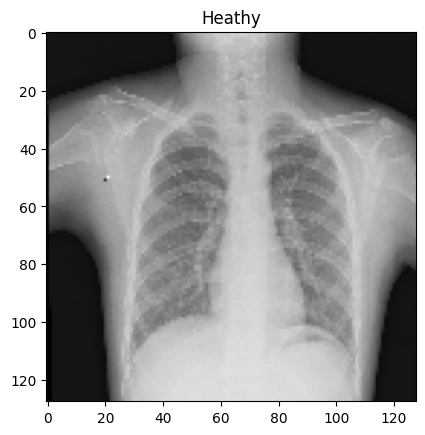

In [13]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import random
import sys
# Reading images 
disease = []
path = './test/PNEUMONIA/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    disease.append(img)
path = './train/PNEUMONIA/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    disease.append(img)
path = './val/PNEUMONIA/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    disease.append(img)
healthy = []
path = './test/NORMAL/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    healthy.append(img)
path = './train/NORMAL/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    healthy.append(img)
path = './val/NORMAL/*.jpeg'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img);
    img = cv2.merge([r, g, b])
    healthy.append(img)
healthy = np.array(healthy)
disease = np.array(disease)
All = np.concatenate((healthy, disease))
All.shape
# Visualising lung disease images
def plot_random(healthy, disease, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    disease_imgs = disease[np.random.choice(disease.shape[0], num, replace=False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("healthy")
        plt.imshow(healthy_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title("disease")
        plt.imshow(disease_imgs[i])
#plot_random(healthy,disease,3)
from torch.utils.data import ConcatDataset
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError
        
    def __len__(self):
        raise NotImplementedError
        
    def __add__(self,other):
        return ConcatDataset([self, other])
# CT class
class CT(Dataset):
    def __init__(self):
        disease = []
        path = '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            disease.append(img)
        path = '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            disease.append(img)
        path = '../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            disease.append(img)
            
        healthy = []
        path = '../input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            healthy.append(img)
        path = '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            healthy.append(img)
        path = '../input/chest-xray-pneumonia/chest_xray/val/NORMAL/*.jpeg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img);
            img = cv2.merge([r, g, b])
            healthy.append(img)
            
        # Images
        healthy = np.array(healthy,dtype=np.float32)
        disease = np.array(disease,dtype=np.float32)
        All = np.concatenate((healthy, disease))
        
        # Assign labels: 0 for healthy, 1 for disease
        healthy_labels = np.zeros(healthy.shape[0], dtype=np.float32)
        disease_labels = np.ones(disease.shape[0], dtype=np.float32)
        
        #Concatenate
        self.images = np.concatenate((healthy, disease), axis = 0)
        self.labels = np.concatenate((healthy_labels, disease_labels))
        
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self,index):
        sample = {'image':self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255.0
# Create an object of the CT class
ct_dataset = CT()
ct_dataset.normalize()
healthy.shape
# Iterating through the dataset
index = list(range(len(ct_dataset)))
random.shuffle(index)
for idx in index:
    sample = ct_dataset[idx]
    img = sample['image']
    label = sample['label']
    plt.title(label)
    plt.imshow(img)
    #plt.show()
it = iter(ct_dataset)
for i in range(10):
    sample = next(it)
    img = sample['image']
    label = sample['label']
    plt.title(label)
    plt.imshow(img)
    #plt.show()
# Creating a dataloader
dataloader = DataLoader(ct_dataset)

# One way of iterating
names={0:'Heathy', 1:'Disease'}
dataloader = DataLoader(ct_dataset, shuffle=True)
for i, sample in enumerate(dataloader):
    img = sample['image'].squeeze()
    img = img.reshape((img.shape[1], img.shape[2], img.shape[0]))
    img = img.reshape((img.shape[0], img.shape[2], img.shape[1]))
    plt.title(names[sample['label'].item()])
    plt.imshow(img)
    #plt.show()
    if i == 5:
        break

# Model
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5))
        
        self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1))
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        
        return x
            
ct_dataset = CT()
ct_dataset.normalize()
device = torch.device('cuda:0')
model = CNN()
dataloader = DataLoader(ct_dataset, batch_size=32, shuffle=False)
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to('cpu').float()  # Convert input data to float32
        # Assuming the input data shape is (batch_size, 128, 128, 3)
        image = image.permute(0, 3, 1, 2)  # Rearrange channels to (batch_size, 3, 128, 128)
        label = D['label'].to('cpu')

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())


    

outputs = np.concatenate( outputs, axis=0 ).squeeze()
y_true = np.concatenate( y_true, axis=0 ).squeeze()
def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x
#  accuracy of un-trained model
accuracy_score(y_true, threshold(outputs))


[Text(0, 0.5, 'Pneumonia'), Text(0, 1.5, 'Healthy')]

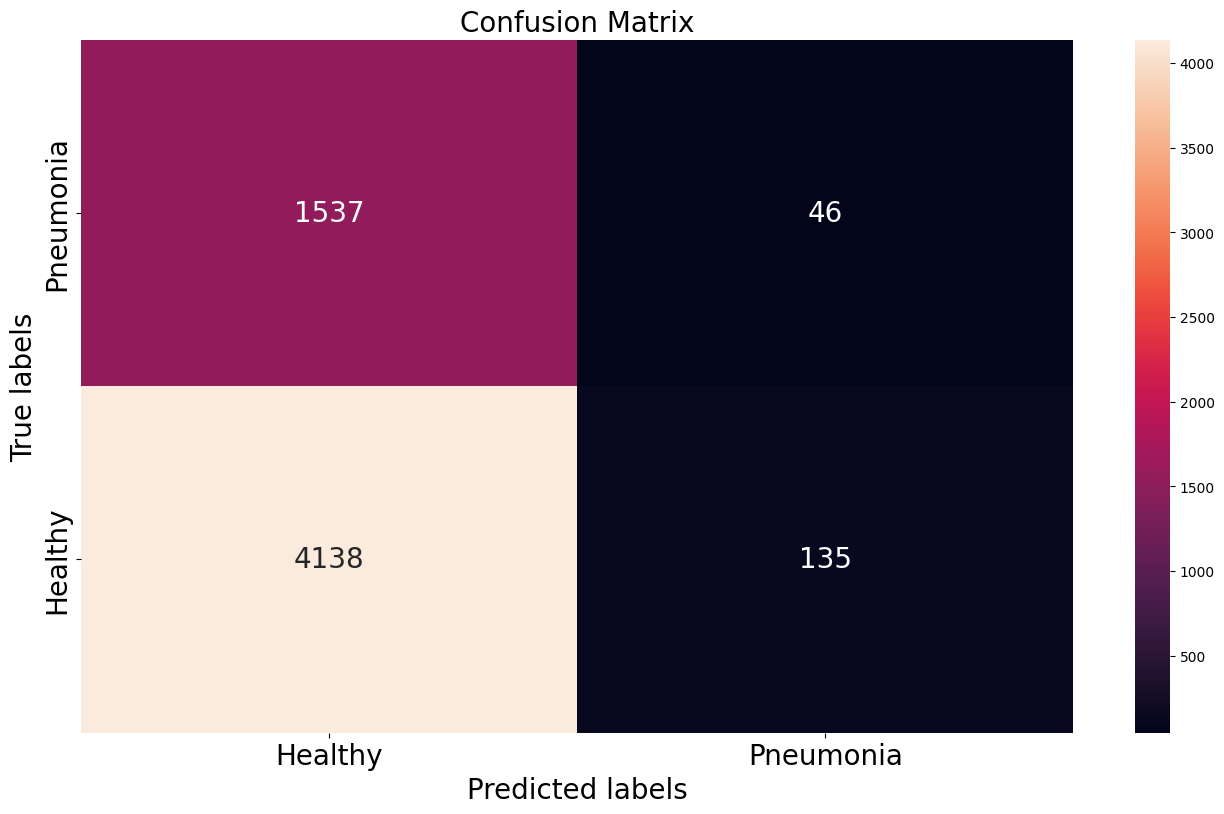

In [14]:
# a better confusion matrix
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20) 
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Pneumonia'], fontsize=20)
ax.yaxis.set_ticklabels(['Pneumonia','Healthy'], fontsize=20)

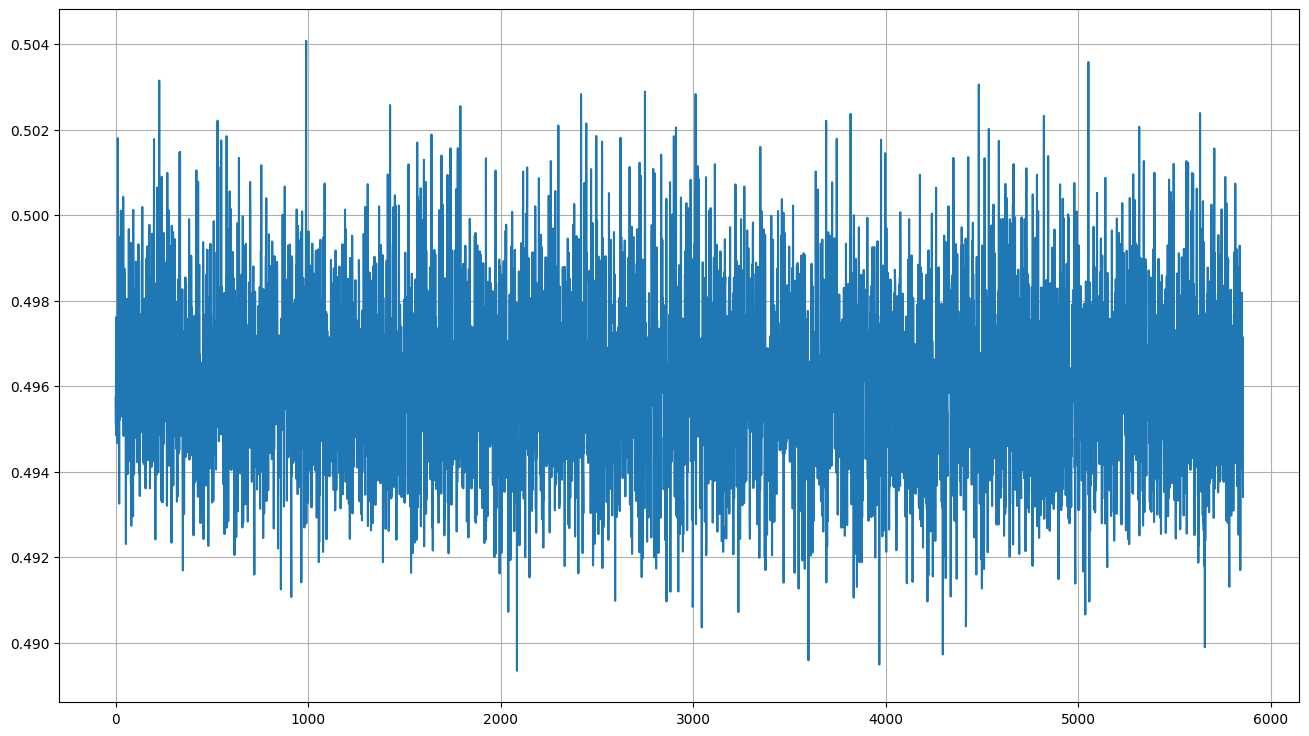

In [15]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
#plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

In [16]:
eta = 0.0001
EPOCH = 21
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(ct_dataset, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [17]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to('cpu').float()
        data = data.permute(0, 3, 1, 2)
        label = D['label'].to('cpu').float()
        y_hat = model(data)
        # define loss function
        error = nn.BCELoss() 
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 2 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))

Train Epoch: 2	Loss: 0.585716
Train Epoch: 4	Loss: 0.298853
Train Epoch: 6	Loss: 0.234898
Train Epoch: 8	Loss: 0.213307
Train Epoch: 10	Loss: 0.202551
Train Epoch: 12	Loss: 0.197944
Train Epoch: 14	Loss: 0.187622
Train Epoch: 16	Loss: 0.185565
Train Epoch: 18	Loss: 0.180506
Train Epoch: 20	Loss: 0.176973


In [19]:
model.eval()
dataloader = DataLoader(ct_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to('cpu').float()
        image = image.permute(0, 3, 1, 2)
        label = D['label'].to('cpu').float()
        
        y_hat = model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [20]:
accuracy_score(y_true, threshold(outputs))

0.9356215846994536

[Text(0, 0.5, 'Pneumonia'), Text(0, 1.5, 'Healthy')]

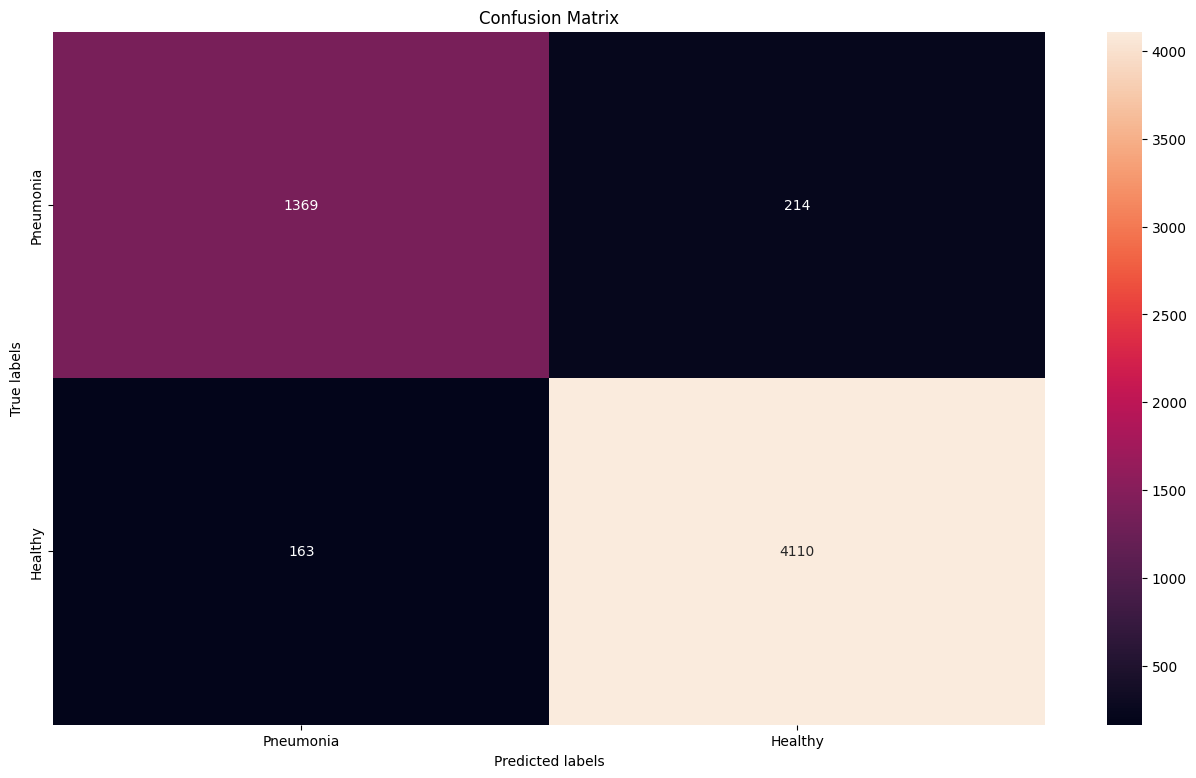

In [21]:
cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pneumonia','Healthy'])
ax.yaxis.set_ticklabels(['Pneumonia','Healthy'])

In [18]:
'''import matplotlib.pyplot as plt

val_losses = []
train_losses = []
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to('cpu').float()
        data = data.permute(0, 3, 1, 2)
        label = D['label'].to('cpu').float()
        y_hat = model(data)
        # define loss function
        error = nn.BCELoss() 
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))
train_losses.append(loss.item())

model.eval()
dataloader = DataLoader(ct_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to('cpu').float()
        image = image.permute(0, 3, 1, 2)
        label = D['label'].to('cpu').float()
        
        y_hat = model(image)
        
        error = nn.BCELoss() 
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Val Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )
val_losses.append(loss_val.item())

plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()'''

'import matplotlib.pyplot as plt\n\nval_losses = []\ntrain_losses = []\nfor epoch in range(1, EPOCH):\n    losses = []\n    for D in dataloader:\n        optimizer.zero_grad()\n        data = D[\'image\'].to(\'cpu\').float()\n        data = data.permute(0, 3, 1, 2)\n        label = D[\'label\'].to(\'cpu\').float()\n        y_hat = model(data)\n        # define loss function\n        error = nn.BCELoss() \n        loss = torch.sum(error(y_hat.squeeze(), label))\n        loss.backward()\n        optimizer.step()\n        losses.append(loss.item())\n    if (epoch+1) % 10 == 0:\n        print(\'Train Epoch: {}\tLoss: {:.6f}\'.format(epoch+1, np.mean(losses)))\ntrain_losses.append(loss.item())\n\nmodel.eval()\ndataloader = DataLoader(ct_dataset, batch_size=32, shuffle=False)\noutputs=[]\ny_true = []\nwith torch.no_grad():\n    for D in dataloader:\n        image =  D[\'image\'].to(\'cpu\').float()\n        image = image.permute(0, 3, 1, 2)\n        label = D[\'label\'].to(\'cpu\').float()\n